<a href="https://colab.research.google.com/github/sakshiigdtuw/AQI-prediction-Model/blob/main/Copy_of_AWS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score

Data Collection & processing

Dataset [Air pollution data of india 2020-2023](https://www.kaggle.com/datasets/seshupavan/air-pollution-data-of-india-2020-2023)

AQI range - 1 to 5

In [2]:
data = pd.read_csv('/content/air_pollution_data.csv')

In [3]:
data.head() #print top 5 rows of dataset

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [4]:
data.tail() #last 5 rows

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
23499,Visakhapatnam,21-05-2023,3,353.81,0.0,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.0,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.0,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.0,1.36,95.84,2.21,30.17,48.89,0.00
23503,Visakhapatnam,25-05-2023,4,427.25,0.0,6.00,88.69,10.73,52.36,61.41,0.20


In [5]:
data.shape

(23504, 11)

In [6]:
# check missing value
data.isnull().sum()


,0
city,0
date,0
aqi,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


Data Analysis**(EDA)**

In [8]:
import plotly.express as px

fig = px.scatter(data,x='pm2_5',y='aqi')
fig.show()

In [9]:
fig_no2 = px.scatter(data,x='no2',y='aqi')
fig_no2.show()

In [10]:
fig_co = px.scatter(data,x='co',y='aqi')
fig_co.show()

**Data Analysis**

In [11]:
x = data.iloc[:,3:11].values
y = data.iloc[:,2].values

In [12]:
x_train , x_test ,y_train , y_test = train_test_split(x,y ,test_size=0.2,random_state=42)
print(f"Training Set: {x_train.shape}\nTesting Set: {x_test.shape}")

Training Set: (18803, 8)
Testing Set: (4701, 8)


In [13]:
models = dict()

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [15]:
decisionTree = DecisionTreeRegressor()
# Train the model
decisionTree.fit(x_train, y_train)
# Make predictions on the test set
train_tree = str(round(decisionTree.score(x_train, y_train)*100,2))
test_tree = str(round(decisionTree.score(x_test, y_test)*100,2))
print(f"Training Set: {train_tree}%\nTesting Set: {test_tree}%")
models["Decision Tree"]=test_tree

Training Set: 100.0%
Testing Set: 94.65%


In [16]:
print("MAE:{}".format(mae(y_test,decisionTree.predict(x_test))*100,2))
print("MSE:{}".format(mse(y_test,decisionTree.predict(x_test))*100,2))
print("R2:{}".format(r2_score(y_test,decisionTree.predict(x_test))*100,2))

MAE:10.721123165283982
MSE:10.76366730482876
R2:94.6456364309195


In [17]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [18]:
train_linreg = str(round(linear_reg.score(x_train, y_train)*100,2))
test_linreg = str(round(linear_reg.score(x_test, y_test)*100,2))
print(f"Training Set: {train_linreg}%\nTesting Set: {test_linreg}%")
models["Linear Regression"]=test_linreg

Training Set: 34.53%
Testing Set: 33.03%


In [19]:
# Linear regression
print(f"MAE: {mae(y_test,linear_reg.predict(x_test))}")
print(f"MSE: {mse(y_test,linear_reg.predict(x_test))}")
print(f"R2: {r2_score(y_test,linear_reg.predict(x_test))}")


MAE: 0.9507551823571195
MSE: 1.3463244839892883
R2: 0.33027372873189753


In [20]:
random_forest = RandomForestRegressor()
# Train the model
random_forest.fit(x_train, y_train)

train_forest = str(round(random_forest.score(x_train, y_train)*100,2))
test_forest = str(round(random_forest.score(x_test, y_test)*100,2))
print("Random Forest Regressor")
print(f"Training Set: {random_forest.score(x_train, y_train)*100}\nTesting Set: {random_forest.score(x_test, y_test)*100}")
models["Random Forest"] = test_forest

Random Forest Regressor
Training Set: 99.60624348973994
Testing Set: 97.31715698125133


In [21]:
print("MAE:{}".format(mae(y_test,random_forest.predict(x_test))))
print("MSE:{}".format(mse(y_test,random_forest.predict(x_test))))
print(f"R2: {r2_score(y_test,random_forest.predict(x_test))*100}")

MAE:0.1077345245692406
MSE:0.053932142097426077
R2: 97.31715698125133


In [22]:
svm = SVR()
svm.fit(x_train, y_train)


SVR()

In [23]:
train_svm = str(round(svm.score(x_train, y_train)*100,2))
test_svm = str(round(svm.score(x_test, y_test)*100,2))
print(f"Training Set: {train_svm}%\nTesting Set: {test_svm}%")
models['SVM'] = test_svm

Training Set: 84.75%
Testing Set: 85.0%


In [24]:
print("MAE:{}".format(mae(y_test,svm.predict(x_test))))
print("MSE:{}".format(mse(y_test,svm.predict(x_test))))
print(f"R2: {r2_score(y_test,svm.predict(x_test))*100}")

MAE:0.3867458327716291
MSE:0.30159262403580606
R2: 84.99733861045418


In [25]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
train_xgb = str(round(xgb.score(x_train, y_train)*100,2))
test_xgb = str(round(xgb.score(x_test, y_test)*100,2))
print(f"Training Set: {train_xgb}%\nTesting Set: {test_xgb}%")
models['XGBoost'] = test_xgb

Training Set: 99.05%
Testing Set: 96.95%


In [27]:
# XGB regression
print("MAE:{}".format(mae(y_test,xgb.predict(x_test))))
print("MSE:{}".format(mse(y_test,xgb.predict(x_test))))
print(f"R2: {r2_score(y_test,xgb.predict(x_test))*100}")

MAE:0.1216065253483136
MSE:0.061303336213107816
R2: 96.95047736167908


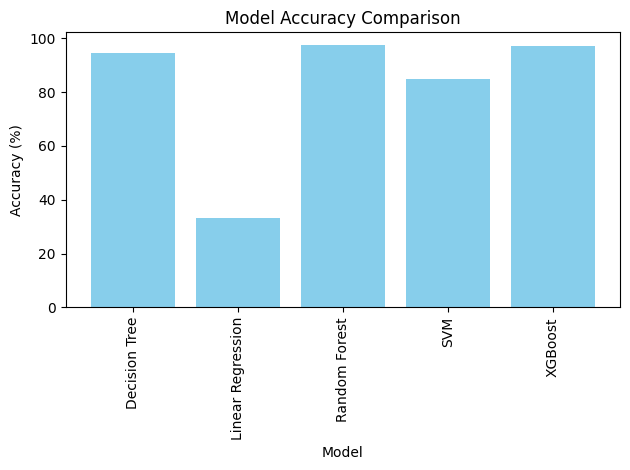

In [28]:
model_name = list(models.keys())
accuracy = [float(val) if isinstance(val, str) else float(val[0]) if isinstance(val, (np.ndarray, list)) and len(val) > 0 else float('nan') for val in models.values()]

# Plot the bar chart
plt.bar(model_name, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=90)  # Rotate model names for better visibility
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

In [29]:
data


,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


In [30]:
data['city'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [31]:
new_data = data[data['city'] == 'Shillong']
print(new_data)

           city        date  aqi      co    no    no2     o3    so2  pm2_5  \
19888  Shillong  30-11-2020    2  297.07  0.52   3.47  85.12   2.56  14.77   
19889  Shillong  01-12-2020    4  560.76  0.00  13.54  44.70   7.99  32.23   
19890  Shillong  02-12-2020    4  494.00  0.00  14.40  42.56   6.20  27.51   
19891  Shillong  03-12-2020    4  720.98  0.00  23.65  45.78  12.64  45.23   
19892  Shillong  04-12-2020    5  921.25  0.00  28.45  53.64  14.19  74.42   
...         ...         ...  ...     ...   ...    ...    ...    ...    ...   
20787  Shillong  21-05-2023    2  303.75  0.00   1.56  74.39   1.36   9.62   
20788  Shillong  22-05-2023    2  367.16  0.00   4.16  39.70   1.22  12.78   
20789  Shillong  23-05-2023    2  407.22  0.00   4.71  35.41   1.07  22.26   
20790  Shillong  24-05-2023    3  487.33  0.00   6.94  19.49   1.16  34.57   
20791  Shillong  25-05-2023    2  440.60  0.00   7.71  17.17   1.49  17.90   

        pm10    nh3  
19888  18.05   3.48  
19889  36.87  13.05

In [32]:
import numpy as np
import pandas as pd

def AQI_predict(city, date, data, model=random_forest):
    """
    Predicts the AQI based on city and date.

    Args:
        city (str): The name of the city.
        date (str): The date in 'YYYY-MM-DD' format.
        data (pd.DataFrame): The original dataframe containing pollution data.
        model: The trained model to use for prediction. Defaults to random_forest.

    Returns:
        int: The predicted AQI value.
    """

    # 1. Convert 'date' column to datetime objects if it's not already:
    data['date'] = pd.to_datetime(data['date'])

    # 2. Filter data for the specific city and date:
    city_data = data[(data['city'] == city) & (data['date'] == pd.to_datetime(date))]

    if city_data.empty:
        print(f"No data found for {city} on {date}. Returning NaN.")
        return np.nan

    # 3. Check if 'pb' and 'benzene' columns are present, and if not, add them with 0 values:
    missing_cols = ['pb', 'benzene']
    for col in missing_cols:
        if col not in city_data.columns:
            city_data[col] = 0  # Or any other suitable default value

    # Select the relevant features for prediction (same as those used for training)
    prediction_array = city_data[['pm2_5', 'no2', 'co', 'o3', 'so2', 'nh3', 'pb', 'benzene']].values

    # Make prediction
    pred = model.predict(prediction_array)

    return int(round(pred[0]))

In [33]:
score_list = []
actual_list = []

In [34]:
city='Ahmedabad'
score = AQI_predict(city, date='2022-11-30', data=data)  # Pass the 'data' DataFrame explicitly
print(f'Predicted Score : {score} || Actual Score : 5')
score_list.append(score)
actual_list.append(5)

Predicted Score : 3 || Actual Score : 5


In [35]:
city='Patna'
score = AQI_predict(city, date='2020-12-04', data=data)  # Pass the 'data' DataFrame explicitly
print(f'Predicted Score : {score} || Actual Score : 5')
score_list.append(score)
actual_list.append(5)

Predicted Score : 4 || Actual Score : 5


In [36]:
city='Bengaluru'
score = AQI_predict(city, date='2023-05-22', data=data)  # Pass the 'data' DataFrame explicitly
print(f'Predicted Score : {score} || Actual Score : 3')
score_list.append(score)
actual_list.append(3)

Predicted Score : 1 || Actual Score : 3


In [37]:
city='Bengaluru'
score = AQI_predict(city, date='2023-05-25', data=data)  # Pass the 'data' DataFrame explicitly
print(f'Predicted Score : {score} || Actual Score : 2')
score_list.append(score)
actual_list.append(2)

Predicted Score : 1 || Actual Score : 2


In [38]:
city='Bhopal'
score = AQI_predict(city, date='2020-12-20', data=data)  # Pass the 'data' DataFrame explicitly
print(f'Predicted Score : {score} || Actual Score : 5')
score_list.append(score)
actual_list.append(5)

Predicted Score : 2 || Actual Score : 5


In [39]:
city='Shillong'
score = AQI_predict(city, date='2023-05-21', data=data)  # Pass the 'data' DataFrame explicitly
print(f'Predicted Score : {score} || Actual Score : 2')
score_list.append(score)
actual_list.append(2)

Predicted Score : 2 || Actual Score : 2


In [40]:
print(score_list)          #........predicted score
print(actual_list)         #........actual score

[3, 4, 1, 1, 2, 2]
[5, 5, 3, 2, 5, 2]


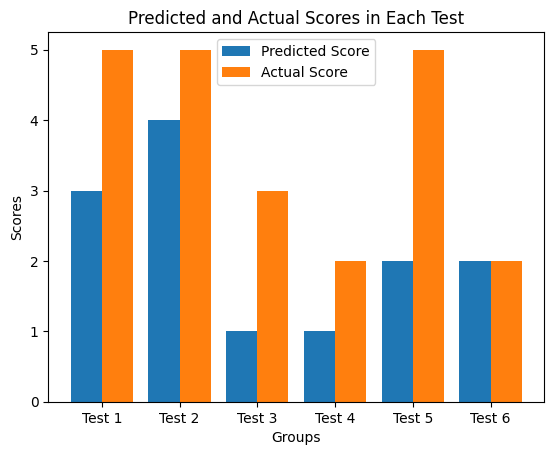

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
# X = ['Test 1','Test 2','Test 3','Test 4','Test 5','Test 6','Test 7'] # Original X
X = ['Test 1','Test 2','Test 3','Test 4','Test 5','Test 6']  # Updated X with 6 elements to match score_list
X_axis = np.arange(len(X))  # Create an array of indices for X

plt.bar(X_axis - 0.2, score_list, 0.4, label='Predicted Score')  # Plot predicted scores
plt.bar(X_axis + 0.2, actual_list, 0.4, label='Actual Score')    # Plot actual scores

plt.xticks(X_axis, X)  # Set the x-axis ticks to be the test names
plt.xlabel("Groups")
plt.ylabel("Scores")
plt.title("Predicted and Actual Scores in Each Test")
plt.legend()
plt.show()

In [42]:
import pickle
filename = "ml_model.pkl"
pickle.dump(random_forest, open(filename, "wb"))         #dumping(writing) data in ml_model.pkl file